# HW07 Jacobian Singularities

In [1]:
import transforms as tr
import transforms_symbolic as st
import kinematics as kin
import kinematics_symbolic as kins
import time

import numpy as np
import sympy as sm
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

from visualization import VizScene 
from visualization import ArmPlayer

np.set_printoptions(precision=4, suppress=True)

## Problem 1

Sketch a few (2 or more) configurations where the manipulators shown on the next page are
in a singular configuration (i.e. the columns of the Jacobian are no longer linearly independent or motion is restricted due to the configuration). You can sketch these by hand, or you
can use the ```visualization.py``` file to plot them. I have provided one file with DH parameters
for both robots (see the ```hw07 dh.py``` file). You can use these and move the robot around
graphically and pick off joint angles from the graphical interface by using the code below:

```
from visualization import ArmPlayer
from kinematics import SerialArm

arm = SerialArm(dh)
ArmPlayer(arm)
```

In addition, if you’d like to check the rank or condition number of a specific Jacobian, given
the Jacobian matrix “J” as a numpy array, you can do the following:

```
import numpy as np
print('the rank is:', np.linalg.matrix_rank(J))
print('the condition number is: ', np.linalg.cond(J))
```

Remember that a large condition number means the matrix is at or near a singularity, whereas
if the rank is less than the number of columns in the Jacobian, the Jacobian is definitely
singular. None of the actual calculations are required, but they may be helpful in increasing
understanding and adding tools to your robotics toolbelt (or arrows to your robotics quiver).

In [2]:
# define dh parameters
a_len = 0.5
d_len = 0.35

dh_a = [[0, d_len, 0., np.pi/2.0],
        [0, 0, a_len, 0], 
        [0, 0, a_len, 0]]

dh_b = [[0, d_len, 0., -np.pi/2.0],
        [0, 0, a_len, 0], 
        [np.pi/2.0, 0, 0, np.pi/2.0], 
        [np.pi/2.0, d_len*2, 0, -np.pi/2.0],
        [0, 0, 0, np.pi/2],
        [0, d_len*2, 0, 0]]

arm1a = kin.SerialArm(dh_a)
arm1b = kin.SerialArm(dh_b)

# q for problem 1a
q1a = [0, np.pi/2, 0]
q1b = [0, 0, 0, 0, 0, 0]

J = arm1b.jacob(q1b)

print(J)
print('Matrix rank: ', np.linalg.matrix_rank(J))
print('Matrix condition number: ', np.linalg.cond(J))
print('svd: ', np.linalg.svd(J)[1])




[[-0.   0.   0.   0.  -0.   0. ]
 [ 1.9  0.   0.  -0.   0.7 -0. ]
 [ 0.  -1.9 -1.4  0.  -0.   0. ]
 [ 0.   0.   0.   1.   0.   1. ]
 [ 0.   1.   1.   0.   0.   0. ]
 [ 1.   0.   0.   0.   1.   0. ]]
Matrix rank:  5
Matrix condition number:  1.873113653039992e+32
svd:  [2.7453 2.4195 1.4142 0.496  0.1821 0.    ]


In [3]:
# uncomment to run arm simulation
# ArmPlayer(arm1b)

### Arm A example 1:

Arm motion is restricted along the z axis.

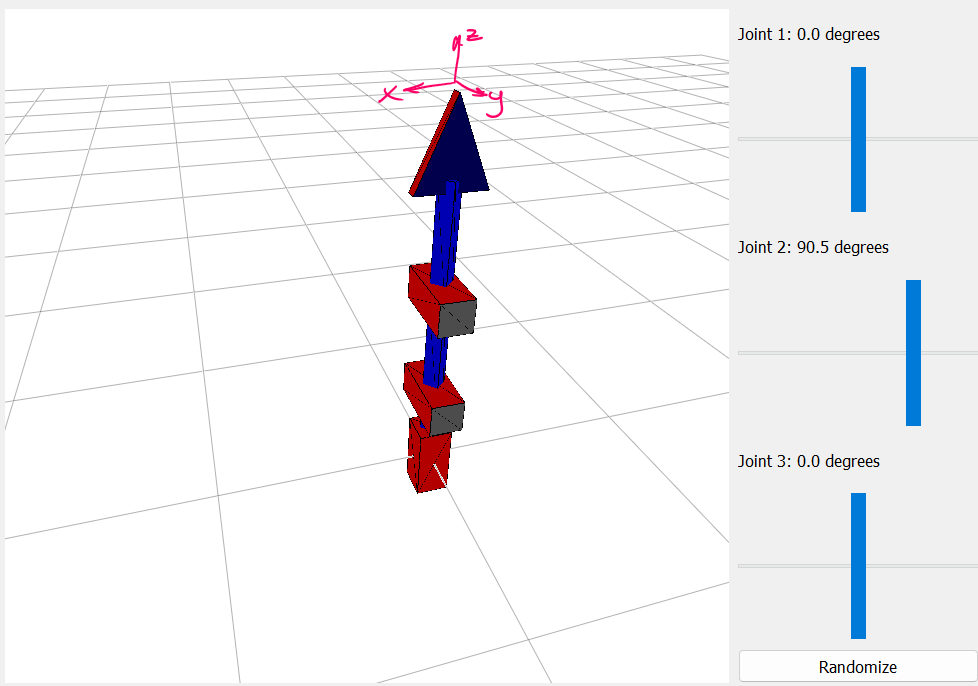

### Arm A example 2:

Arm motion is restricted along the y axis.

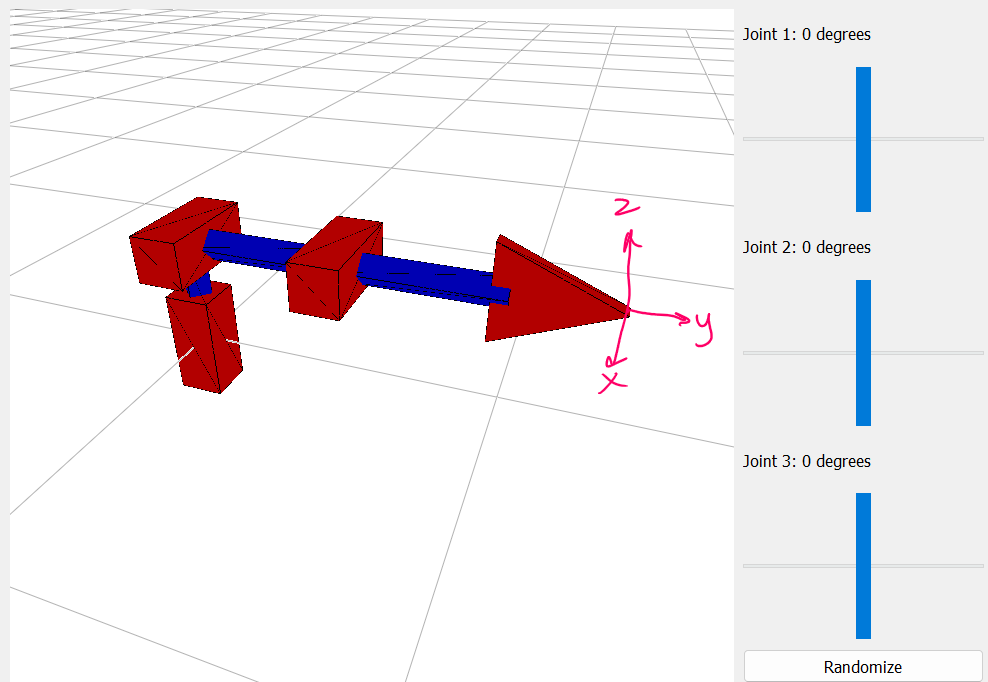

### Arm B example 1: 

Arm motion is restricted along the y axis.

In [4]:
# svd of arm
q1b = [0, 0, 0, 0, 0, 0]

J = arm1b.jacob(q1b)

print(J)
print('Matrix rank: ', np.linalg.matrix_rank(J))
print('Matrix condition number: ', np.linalg.cond(J))
print('svd: ', np.linalg.svd(J)[1])

[[-0.   0.   0.   0.  -0.   0. ]
 [ 1.9  0.   0.  -0.   0.7 -0. ]
 [ 0.  -1.9 -1.4  0.  -0.   0. ]
 [ 0.   0.   0.   1.   0.   1. ]
 [ 0.   1.   1.   0.   0.   0. ]
 [ 1.   0.   0.   0.   1.   0. ]]
Matrix rank:  5
Matrix condition number:  1.873113653039992e+32
svd:  [2.7453 2.4195 1.4142 0.496  0.1821 0.    ]


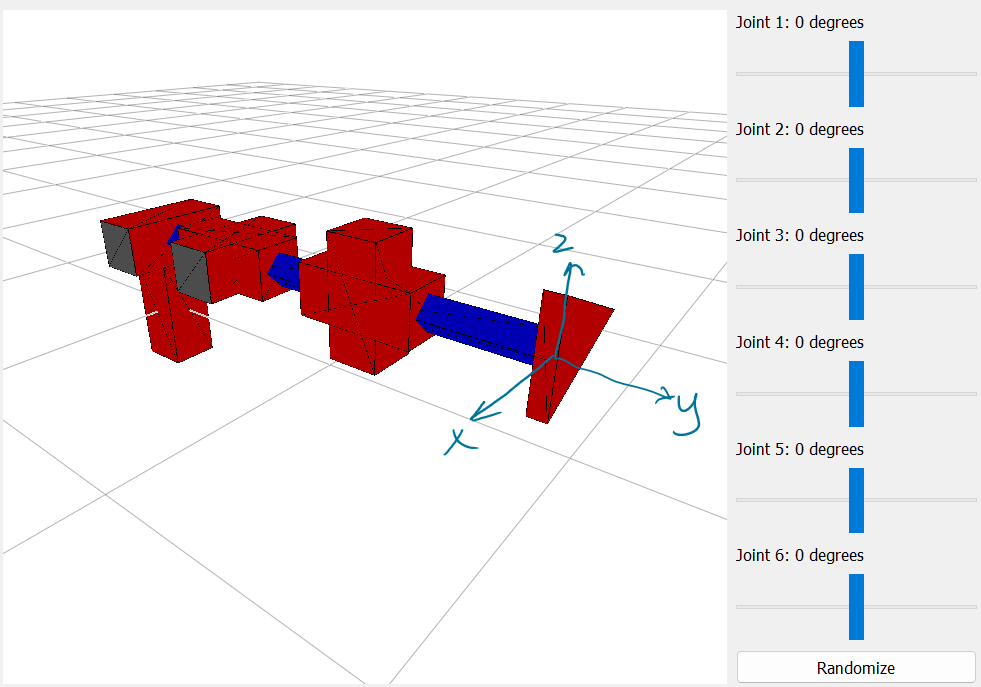

### Arm B example 2: 

Arm motion is restricted along the x and y axes.

In [5]:
# find svd of matrix
q1b = [0, -np.pi/2, -np.pi/2, np.pi/2, -np.pi/1, 0]

J = arm1b.jacob(q1b)

print(J)
print('Matrix rank: ', np.linalg.matrix_rank(J))
print('Matrix condition number: ', np.linalg.cond(J))
print('svd: ', np.linalg.svd(J)[1])
print('min value of svd is 0, so its at a singularity')

[[ 0.   0.5  0.   0.  -0.   0. ]
 [ 0.   0.  -0.  -0.  -0.   0. ]
 [-0.  -0.   0.   0.   0.7  0. ]
 [ 0.   0.   0.  -1.  -0.   1. ]
 [ 0.   1.   1.   0.  -1.  -0. ]
 [ 1.   0.   0.   0.  -0.   0. ]]
Matrix rank:  5
Matrix condition number:  1.8755812757755628e+16
svd:  [1.8055 1.4142 1.     0.6177 0.3138 0.    ]
min value of svd is 0, so its at a singularity


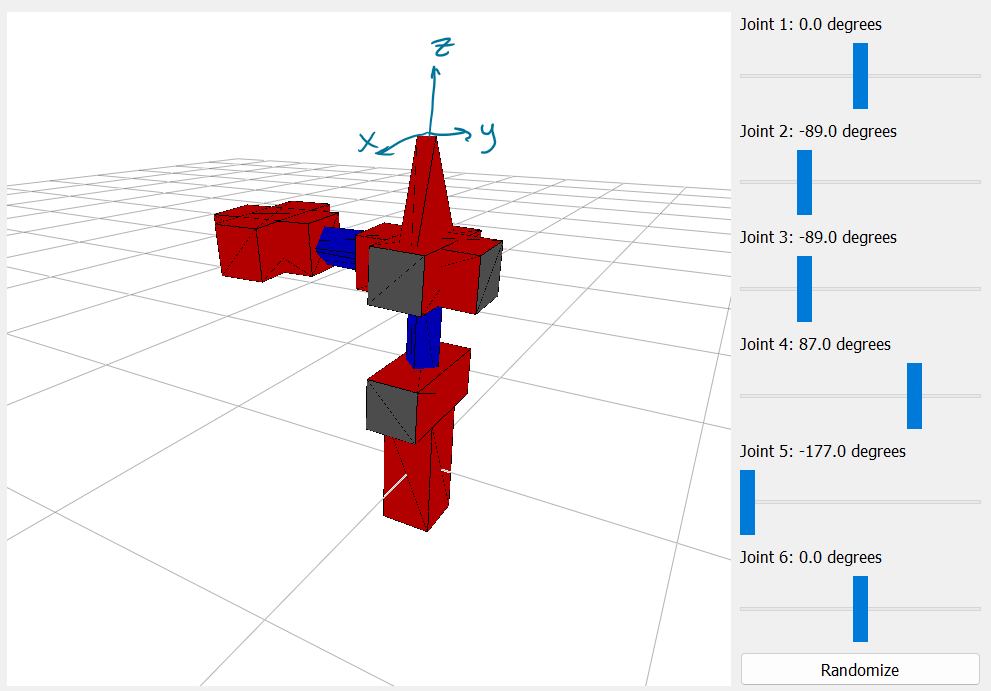

## Problem 2

For (a) and (b) in problem 1, please sketch at least one reciprocal wrench (i.e. directions
in which the structure of the robot can apply/withstand “infinite” force) given the singular
configuration that you chose. 

These reciprocal wrenches may be because of 
* the configuration (meaning in another joint configuration they could not be applied), or
* because the robot has a limited number of degrees of freedom to begin with. 

Either is fine.

### Arm A Wrench Example

In [6]:
q2a = [0, np.pi/2, 0]

J2a = arm1a.jacob(q2a)
print('Jacobian: \n', J2a)

Wa = np.array([0, 100, 0, 100, 0, 0])

print('\nTorques of motors:')
print(J2a.T @ Wa)
print('This arm can withstand infinite force in y and infinite torque in x in this configuration.')

Jacobian: 
 [[-0.  -1.  -0.5]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]
 [ 0.  -1.  -1. ]
 [ 1.   0.   0. ]]

Torques of motors:
[0. 0. 0.]
This arm can withstand infinite force in y and infinite torque in x in this configuration.


In [7]:
# uncomment to visualize arm
# ArmPlayer(arm1a)

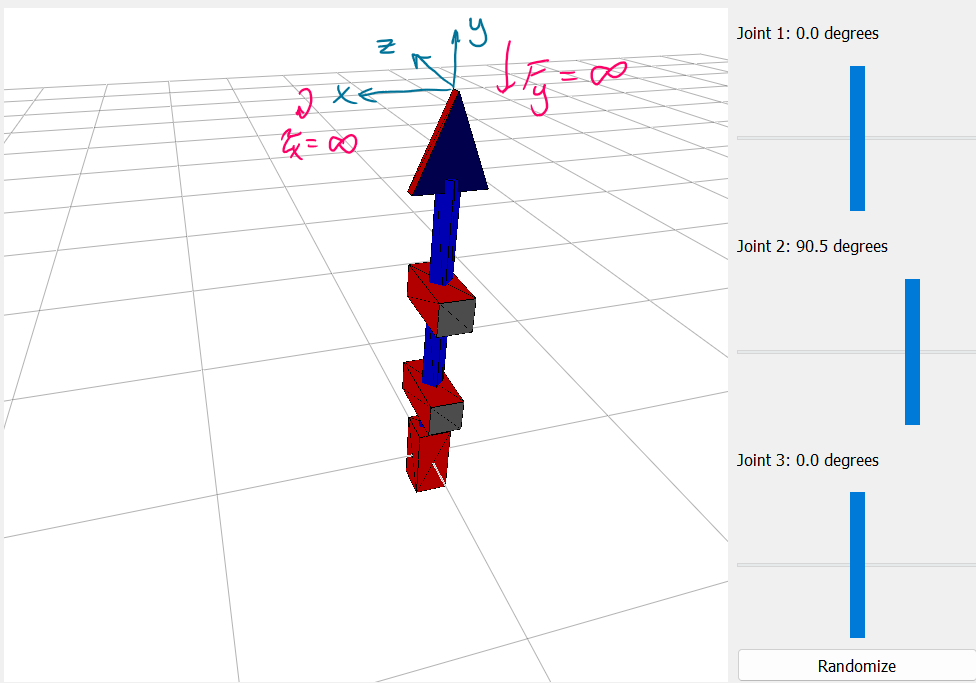

### Arm B Wrench Example

In [8]:
q2b = [0, 0, 0, 0, 0, 0]

J2b = arm1b.jacob(q2b)
print('Jacobian: \n', J2b)

Wb = np.array([100, 0, 0, 0, 0, 0])

print('\nTorques of motors:')
print(J2b.T @ Wb)
print('This arm can withstand infinite force in x in this configuration.')

Jacobian: 
 [[-0.   0.   0.   0.  -0.   0. ]
 [ 1.9  0.   0.  -0.   0.7 -0. ]
 [ 0.  -1.9 -1.4  0.  -0.   0. ]
 [ 0.   0.   0.   1.   0.   1. ]
 [ 0.   1.   1.   0.   0.   0. ]
 [ 1.   0.   0.   0.   1.   0. ]]

Torques of motors:
[-0.  0.  0.  0. -0.  0.]
This arm can withstand infinite force in x in this configuration.


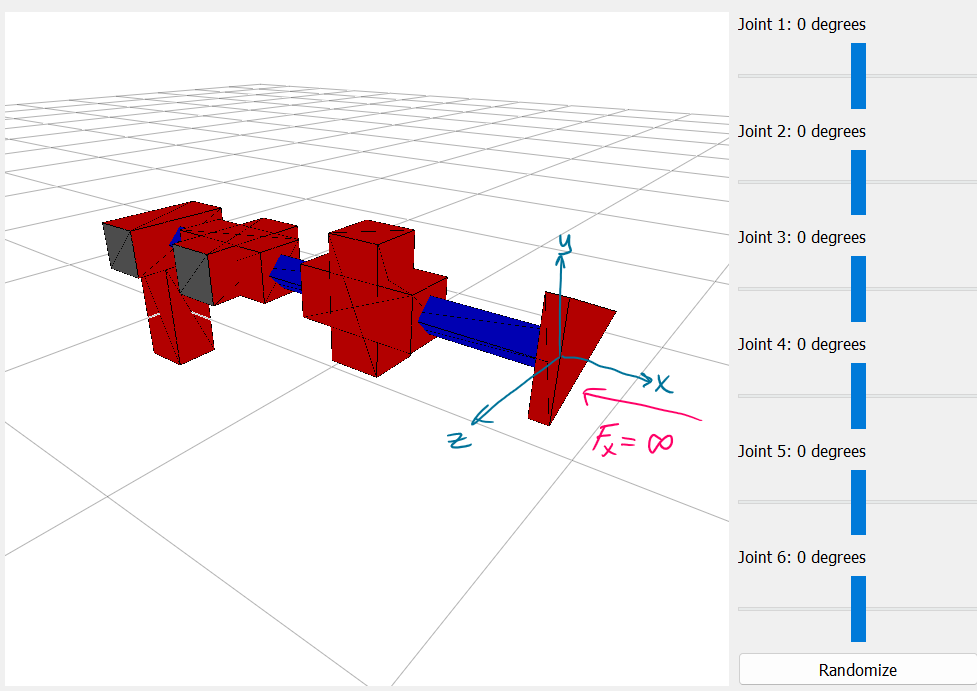

## Problem 3

Write the Jacobian for the 2-link manipulator shown below in the end effector frame (instead
of in the base frame). Let the link lengths be equal to 1, and the joint angles be zero (i.e.
solve for the Jacobian in the currently shown configuration). Use the following two methods
(which should agree in terms of the result):

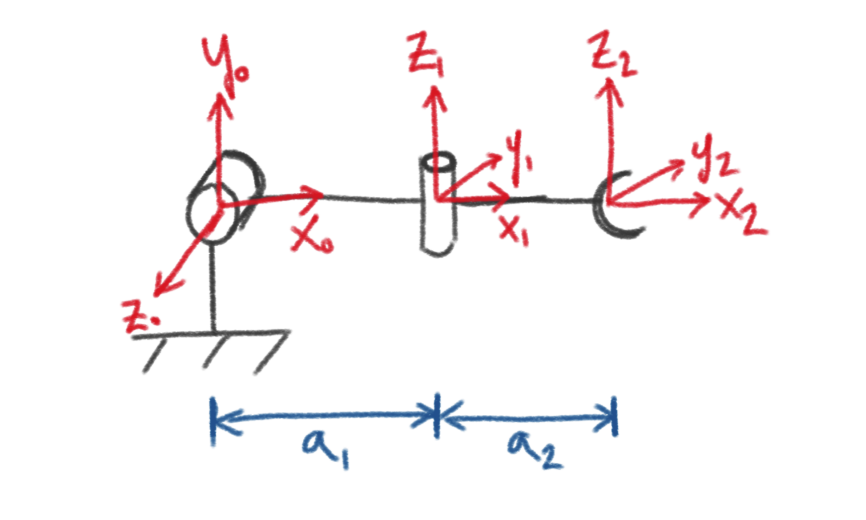

### (a) By direct calculation

In [9]:
# define function to calculate jacobian
def jacob(z, o):
    # define empty jacobian
    n_joints = len(z)
    J = np.zeros((6, n_joints))

    for i in range(n_joints):
        # define velocity section of jacobian
        J[0:3, i] = np.cross( z[i], (o[-1] - o[i]) )

        # define omega section of jacobian
        J[3:6, i] = z[i]

    return J

In [10]:
a1, a2 = 1, 1
o = [np.array([-a1-a2, 0, 0]),
     np.array([-a2, 0, 0]),
     np.array([0, 0, 0])]

z = [np.array([0, -1, 0]),
     np.array([0, 0, 1])]

J3_manual = jacob(z, o)

### (b) by transforming the original Geometric Jacobian that we found in class lecture

In [11]:
dh3 = [[0, 0, a1, -np.pi/2],
       [0, 0, a2, 0]]

q3 = [0, 0]

arm3 = kin.SerialArm(dh3)
J3 = arm3.jacob(q3)
J3 = np.round(J3, decimals=3)

R_0_in_n = arm3.fk(q3)[0:3, 0:3]

transform = np.block([[R_0_in_n.T, np.zeros((3,3))],
                      [np.zeros((3,3)), R_0_in_n.T]])

J3_n_in_n = transform @ J3
J3_n_in_n = np.round(J3_n_in_n, decimals=3)

# ArmPlayer(arm3)
print(J3_n_in_n)
print('\nJ3 manual:')
J3_manual

[[ 0.  0.]
 [ 0.  1.]
 [ 2. -0.]
 [ 0.  0.]
 [-1.  0.]
 [ 0.  1.]]

J3 manual:


array([[ 0.,  0.],
       [ 0.,  1.],
       [ 2.,  0.],
       [ 0.,  0.],
       [-1.,  0.],
       [ 0.,  1.]])

In [12]:
# test if jacobians are equal
J3_n_in_n == J3_manual

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

## Problem 4

Start by copying the function and import statement inside “hw07_Z_shift.py” into your “kinematics.py” file. Now using the following DH parameters which describe a Puma 560 robot:

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Link} & \theta_i & d_i & a_i & \alpha_i \\
\hline
1 & q_1 & 0 & 0 & \frac{\pi}{2} \\
2 & q_2 & 0 & 0.4318 & 0 \\
3 & q_3 & 0.15 & 0.02 & -\frac{\pi}{2} \\
4 & q_4 & 0.4318 & 0 & \frac{\pi}{2} \\
5 & q_5 & 0 & 0 & -\frac{\pi}{2} \\
6 & q_6 & 0.4 & 0 & 0 \\
\hline
\end{array}
$$


and given the transformation between coordinate frame 6 and the tool tip (translation in z-direction at tip and then rotation 90 degrees about y-axis):

$$
T_{\text{tool}}^6 = 
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
-1 & 0 & 0 & 0.2 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Find the Jacobian at the tool tip and in the tool frame $ J^{\text{tool}}_{\text{tool}}(q) $ starting with the Jacobian at the end effector in the base frame $ J^0_6(q) $ using the shifting law (which we called “Z” from class). Motivation for this would be that it’s easier to describe a task in the tool frame directly, rather than the base frame. The configuration of the actual robot (the joint angles) does not matter near as much as getting the code right, but my solution will compute this Jacobian for the default of all joint angles set to zero. After completing the problem, compare the end effector velocity versus the tool tip velocity for different joint velocities and see if they make sense to you. You may want to use functions from “VizScene” to help visualize some of these coordinate frames and velocities.


In [ ]:
# define arm
dh4 = [[0, 0,       0,      np.pi/2],
       [0, 0,       0.4318, 0],
       [0, 0.15,    0.02,   -np.pi/2],
       [0, 0.4318,  0,       np.pi/2],
       [0, 0,       0,      -np.pi/2],
       [0, 0.4,     0,      0]]

arm4 = kin.SerialArm(dh4)

# ArmPlayer(arm4)

In [16]:
R_tool = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [-1, 0, 0]])

p_tool = np.array([0, 0, 0.2])

R_0_in_6 = arm4.fk([0, 0, 0, 0, 0, 0])[0:3, 0:3].T

J_tool_in_n = arm4.Z_shift(R_tool, p_tool, p_frame='i')
Z_6_in_tool_from_6_to_tool = arm4.Z_shift(R=R_0_in_6)
J = arm4.jacob([0, 0, 0, 0, 0, 0])

print('J_no_tool:\n', J)
print('\nJ_tool:\n', J_tool_in_n)

J_no_tool:
 [[ 0.15   -0.8318 -0.8318  0.     -0.4     0.    ]
 [ 0.4518  0.      0.      0.      0.      0.    ]
 [-0.      0.4518  0.02    0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.     -1.     -1.      0.     -1.      0.    ]
 [ 1.      0.      0.      1.      0.      1.    ]]

J_tool:
 [[ 0.   0.   1.   0.   0.   0. ]
 [ 0.   1.   0.  -0.2  0.   0. ]
 [-1.   0.   0.   0.  -0.2  0. ]
 [ 0.   0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.  -1.   0.   0. ]]


In [17]:
J_tool_in_n @ J @ Z_6_in_tool_from_6_to_tool

array([[ 0.    ,  0.4518,  0.02  ,  0.    ,  0.    ,  0.    ],
       [ 0.4518,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.15  ,  1.0318,  1.0318,  0.    ,  0.6   ,  0.    ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ],
       [ 0.    , -1.    , -1.    ,  0.    , -1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])